In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('./NFL.csv')
data.head()

,Year,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,Drafted..tm.rnd.yr.,BMI,Player_Type,Position_Type,Position,Drafted
0,2009,Beanie Wells\WellCh00,20.0,Ohio St.,1.8542,106.594207,4.38,85.09,25.0,325.12,NaN,NaN,Arizona Cardinals / 1st / 31st pick / 2009,31.004194,offense,backs_receivers,RB,Yes
1,2009,Will Davis\DaviWi99,22.0,Illinois,1.8796,118.387609,4.84,83.82,27.0,292.10,7.38,4.45,Arizona Cardinals / 6th / 204th pick / 2009,33.510073,defense,defensive_lineman,DE,Yes
2,2009,Herman Johnson\JohnHe23,24.0,LSU,2.0066,165.107623,5.50,NaN,21.0,NaN,NaN,NaN,Arizona Cardinals / 5th / 167th pick / 2009,41.005821,offense,offensive_lineman,OG,Yes
3,2009,Rashad Johnson\JohnRa98,23.0,Alabama,1.8034,92.079251,4.49,93.98,15.0,304.80,7.09,4.23,Arizona Cardinals / 3rd / 95th pick / 2009,28.312463,defense,defensive_back,FS,Yes
4,2009,Cody Brown\BrowCo96,22.0,Connecticut,1.8796,110.676538,4.76,92.71,26.0,304.80,7.10,4.40,Arizona Cardinals / 2nd / 63rd pick / 2009,31.327425,defense,line_backer,OLB,Yes


In [3]:
#First we want to check to ensure that there are no duplicates in the player column. 
print(data['Player'].value_counts())
print('We can see that there are 2 players that are listed as Chris Jones. It is important to make sure that the same entry was not made twice. ')
data[data['Player'] == 'Chris Jones'] 

Player
Chris Jones                  2
Beanie Wells\WellCh00        1
Sam Swank                    1
Michael Bennett\BennMi99     1
Kahlil Bell\BellKa00         1
                            ..
Alfred Blue\BlueAl00         1
Xavier Su'a-Filo\Sua-Xa00    1
Jeoffrey Pagan\PagaJe00      1
Jadeveon Clowney\ClowJa00    1
Nasir Adderley               1
Name: count, Length: 3476, dtype: int64
We can see that there are 2 players that are listed as Chris Jones. It is important to make sure that the same entry was not made twice. 


,Year,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,Drafted..tm.rnd.yr.,BMI,Player_Type,Position_Type,Position,Drafted
3029,2015,Chris Jones,NaN,Alabama,1.7780,82.553811,4.63,82.55,8.0,302.26,6.91,4.19,NaN,26.114013,offense,backs_receivers,WR,No
3347,2018,Chris Jones,NaN,Nebraska,1.8288,88.450512,4.57,NaN,14.0,NaN,NaN,NaN,NaN,26.446483,defense,defensive_back,CB,No


In [4]:
# For our model we will need to convert the drafted values to Binary. 

data['Drafted'] = data['Drafted'].map({'Yes': 1, 'No': 0}).astype('int')
data.head()



,Year,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,Drafted..tm.rnd.yr.,BMI,Player_Type,Position_Type,Position,Drafted
0,2009,Beanie Wells\WellCh00,20.0,Ohio St.,1.8542,106.594207,4.38,85.09,25.0,325.12,NaN,NaN,Arizona Cardinals / 1st / 31st pick / 2009,31.004194,offense,backs_receivers,RB,1
1,2009,Will Davis\DaviWi99,22.0,Illinois,1.8796,118.387609,4.84,83.82,27.0,292.10,7.38,4.45,Arizona Cardinals / 6th / 204th pick / 2009,33.510073,defense,defensive_lineman,DE,1
2,2009,Herman Johnson\JohnHe23,24.0,LSU,2.0066,165.107623,5.50,NaN,21.0,NaN,NaN,NaN,Arizona Cardinals / 5th / 167th pick / 2009,41.005821,offense,offensive_lineman,OG,1
3,2009,Rashad Johnson\JohnRa98,23.0,Alabama,1.8034,92.079251,4.49,93.98,15.0,304.80,7.09,4.23,Arizona Cardinals / 3rd / 95th pick / 2009,28.312463,defense,defensive_back,FS,1
4,2009,Cody Brown\BrowCo96,22.0,Connecticut,1.8796,110.676538,4.76,92.71,26.0,304.80,7.10,4.40,Arizona Cardinals / 2nd / 63rd pick / 2009,31.327425,defense,line_backer,OLB,1


In [5]:
nan_counts = data.isna().sum()
nan_counts


Year                      0
Player                    0
Age                     550
School                    0
Height                    0
Weight                    0
Sprint_40yd             174
Vertical_Jump           697
Bench_Press_Reps        905
Broad_Jump              728
Agility_3cone          1217
Shuttle                1140
Drafted..tm.rnd.yr.    1223
BMI                       0
Player_Type               0
Position_Type             0
Position                  0
Drafted                   0
dtype: int64

In [6]:
data = data.drop(columns=['Agility_3cone', 'Shuttle'])

In [7]:
data.head()

,Year,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Drafted..tm.rnd.yr.,BMI,Player_Type,Position_Type,Position,Drafted
0,2009,Beanie Wells\WellCh00,20.0,Ohio St.,1.8542,106.594207,4.38,85.09,25.0,325.12,Arizona Cardinals / 1st / 31st pick / 2009,31.004194,offense,backs_receivers,RB,1
1,2009,Will Davis\DaviWi99,22.0,Illinois,1.8796,118.387609,4.84,83.82,27.0,292.10,Arizona Cardinals / 6th / 204th pick / 2009,33.510073,defense,defensive_lineman,DE,1
2,2009,Herman Johnson\JohnHe23,24.0,LSU,2.0066,165.107623,5.50,NaN,21.0,NaN,Arizona Cardinals / 5th / 167th pick / 2009,41.005821,offense,offensive_lineman,OG,1
3,2009,Rashad Johnson\JohnRa98,23.0,Alabama,1.8034,92.079251,4.49,93.98,15.0,304.80,Arizona Cardinals / 3rd / 95th pick / 2009,28.312463,defense,defensive_back,FS,1
4,2009,Cody Brown\BrowCo96,22.0,Connecticut,1.8796,110.676538,4.76,92.71,26.0,304.80,Arizona Cardinals / 2nd / 63rd pick / 2009,31.327425,defense,line_backer,OLB,1


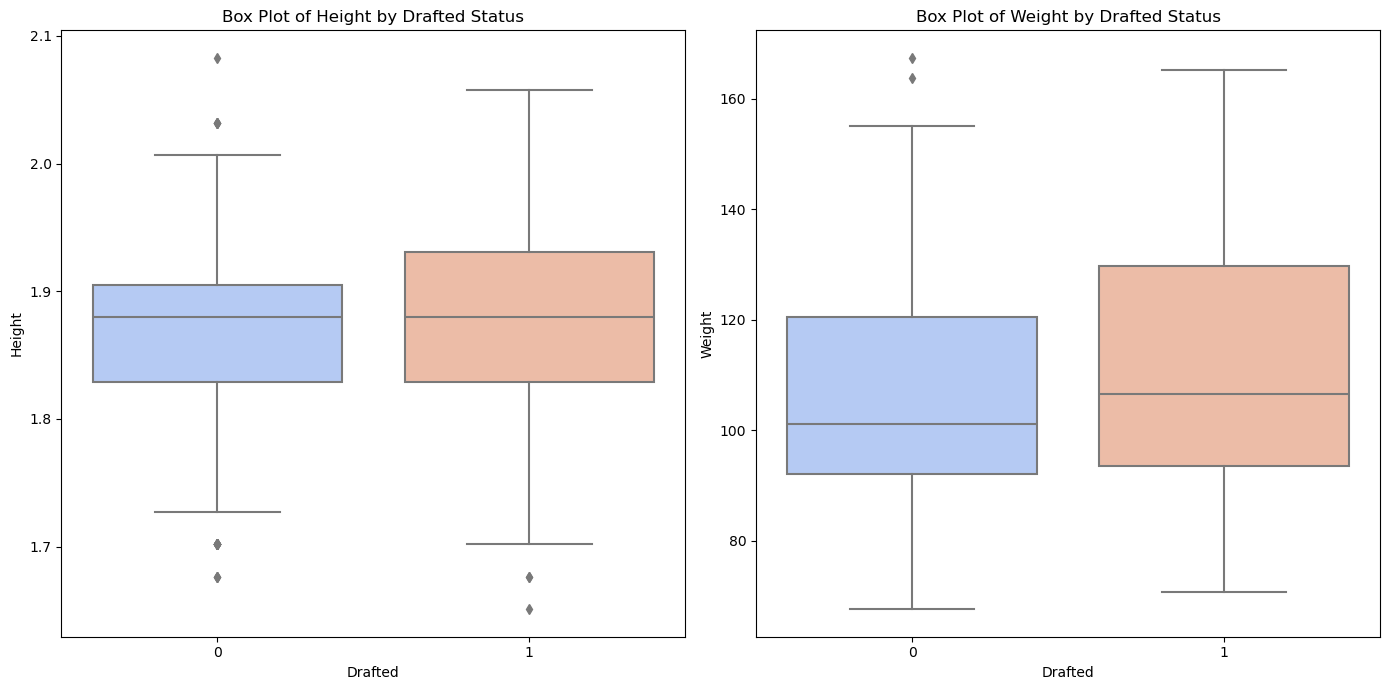

In [8]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.boxplot(x='Drafted', y='Height', data=data, palette='coolwarm')
plt.title('Box Plot of Height by Drafted Status')

plt.subplot(1, 2, 2)
sns.boxplot(x='Drafted', y='Weight', data=data, palette='coolwarm')
plt.title('Box Plot of Weight by Drafted Status')

plt.tight_layout()
plt.show()

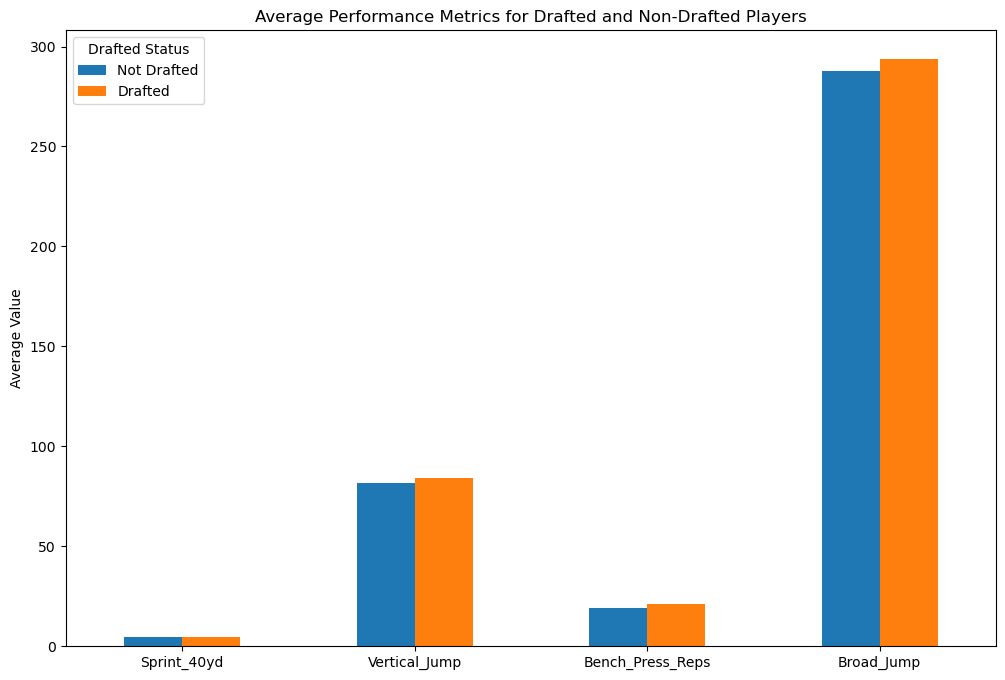

In [9]:


# Calculate the average of each value for drafted and non-drafted players
average_values = data.groupby('Drafted')[['Sprint_40yd', 'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump']].mean().T
average_values.columns = ['Not Drafted', 'Drafted']

# Plot the bar chart
average_values.plot(kind='bar', figsize=(12, 8))
plt.title('Average Performance Metrics for Drafted and Non-Drafted Players')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.legend(title='Drafted Status')
plt.show()

In [10]:
data = data[['Height', 'Weight', 'BMI', 'Vertical_Jump', 'Broad_Jump', 'Drafted']]
print(data['Drafted'].value_counts())
drop = data.dropna()
print(drop['Drafted'].value_counts())
drafted_1 = data[data['Drafted'] == 1]
drafted_0 = data[data['Drafted'] == 0]

drafted_1_sampled = drafted_1.sample(n=906, random_state=42)

balanced_data = pd.concat([drafted_1_sampled, drafted_0])

balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

print(balanced_data['Drafted'].value_counts())



Drafted
1    2254
0    1223
Name: count, dtype: int64
Drafted
1    1793
0     906
Name: count, dtype: int64
Drafted
0    1223
1     906
Name: count, dtype: int64


In [11]:
index = balanced_data.index.to_list()
print(balanced_data.shape)
shuffled_index = np.random.permutation(index)
print('Shuffled Index: ', shuffled_index)
balanced_data = balanced_data.reindex(shuffled_index)
balanced_data = balanced_data.dropna()
print(balanced_data.shape)

(2129, 6)
Shuffled Index:  [1408 1485  860 ...  567  126 1628]
(1634, 6)


In [12]:
Y = balanced_data[['Drafted']]
print('Shape of Y: ', Y.shape)
X = balanced_data[['Height', 'Weight', 'BMI', 'Vertical_Jump', 'Broad_Jump']].dropna()
print('Shape of X: ', X.shape)

Shape of Y:  (1634, 1)
Shape of X:  (1634, 5)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=1234)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=1234)

print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_val: ", X_val.shape)
print("Shape of Y_val: ", Y_val.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (980, 5)
Shape of Y_train:  (980, 1)
Shape of X_val:  (327, 5)
Shape of Y_val:  (327, 1)
Shape of X_test:  (327, 5)
Shape of Y_test:  (327, 1)


In [14]:
X_train_quantiles = X_train.quantile([0.25, 0.5, 0.75, 0.95])

mean = X_train.mean()
std = X_train.std()
X_train_std = (X_train - mean) /std
X_val_std = (X_val - mean) /std
X_test_std = (X_test - mean) /std

mean = Y_train.mean()
std = Y_train.std()
Y_train_std = (Y_train - mean) /std
Y_val_std = (Y_val - mean) /std
Y_test_std = (Y_test - mean) /std


In [15]:
import tensorflow as tf

def build_model(num_features, learning_rate):
  """Build a TF linear regression model using Keras.

  Args:
    num_features: The number of input features.
    learning_rate: The desired learning rate for SGD.

  Returns:
    model: A tf.keras model (graph).
  """
  # This is not strictly necessary, but each time you build a model, TF adds
  # new nodes (rather than overwriting), so the colab session can end up
  # storing lots of copies of the graph when you only care about the most
  # recent. Also, as there is some randomness built into training with SGD,
  # setting a random seed ensures that results are the same on each identical
  # training run.
  tf.keras.backend.clear_session()
  tf.random.set_seed(0)

  # Build a model using keras.Sequential. While this is intended for neural
  # networks (which may have multiple layers), we want just a single layer for
  # linear regression.
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(
      units=1,        # output dim
      input_shape=[num_features],  # input dim
      use_bias=True,               # use a bias (intercept) param
      kernel_initializer=tf.ones_initializer,  # initialize params to 1
      bias_initializer=tf.ones_initializer    # initialize bias to 1
  ))

  # We need to choose an optimizer. We'll use GD, which is actually mini-batch GD
  optimizer =  tf.keras.optimizers.SGD(learning_rate=learning_rate)

  # Finally, compile the model. This finalizes the graph for training.
  # We specify the loss and the optimizer above
  model.compile(
        optimizer=optimizer,
        loss='mse', 
        metrics = ['accuracy']
  )
    
  return model

2024-07-28 09:12:54.026176: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[4.043443202972412, 3.086885690689087, 2.503960371017456, 2.103224754333496, 1.8141510486602783, 1.6009529829025269, 1.4420312643051147, 1.3230960369110107, 1.2333242893218994, 1.165132761001587, 1.1132766008377075, 1.0735349655151367, 1.0430667400360107, 1.019681692123413, 1.0015456676483154, 0.9875516295433044, 0.976616621017456, 0.9679250717163086, 0.9610719680786133, 0.9558472633361816]


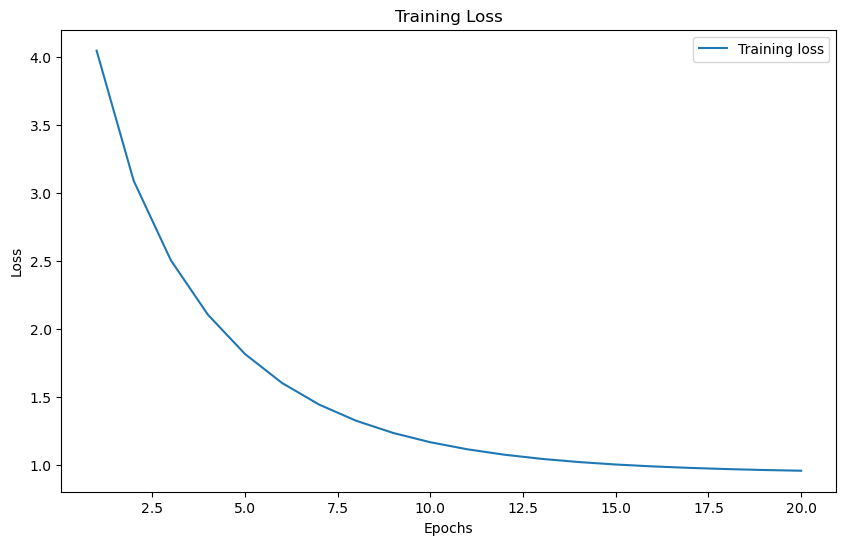

In [16]:
tf.random.set_seed(0)

model_tf = build_model(
        num_features=X_train_std.shape[1],
        learning_rate=.0001)

# 3. Fit the model
baseline_fit_tf = model_tf.fit(
      x = X_train_std,
      y = Y_train_std,
      validation_data=(X_val_std, Y_val_std),
      epochs=20,
      batch_size=1, #use all the data
      verbose=0)

#4
loss = baseline_fit_tf.history['loss']
epochs = range(1, len(loss) + 1)
print(loss)
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

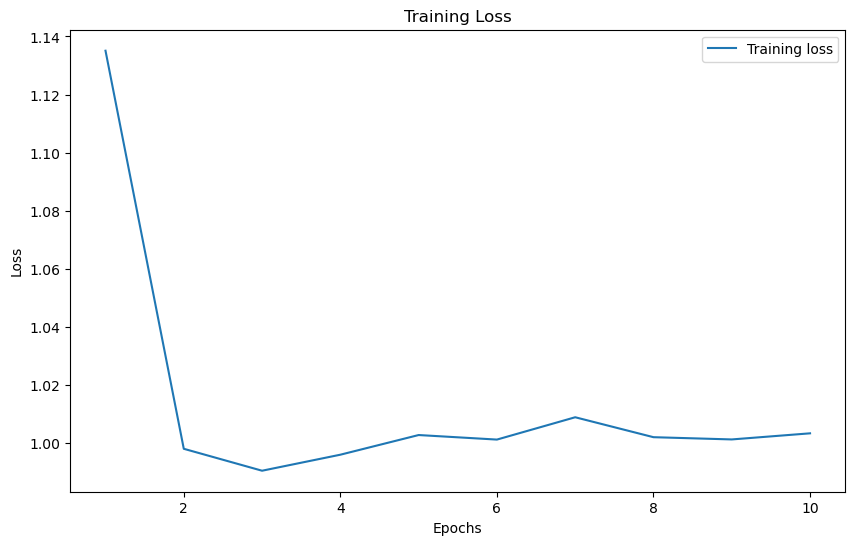

2. Learned parameters of the model:
  [array([[0.09967302],
       [0.25678062],
       [0.18318397],
       [0.25428897],
       [0.25005406]], dtype=float32), array([-0.04773684], dtype=float32)]
3. The loss at the final epoch:  1.003353476524353
4. The percentage loss between validation and training is:  -0.87 % 


In [17]:
tf.random.set_seed(0)
# YOUR CODE HERE

model_tf = build_model(
        num_features=X_train_std.shape[1],
        learning_rate=.01)

# 3. Fit the model
baseline_fit_tf = model_tf.fit(
      x = X_train_std,
      y = Y_train_std,
      validation_data=(X_val_std, Y_val_std),
      epochs=10,
      batch_size=1, #use all the data
      verbose=0)

loss = baseline_fit_tf.history['loss']
val_loss = baseline_fit_tf.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print('2. Learned parameters of the model:\n ', model_tf.layers[0].get_weights())
print('3. The loss at the final epoch: ', loss[-1])
val_loss = baseline_fit_tf.history['val_loss'][-1]
percent = round(((val_loss - loss[-1]) /loss[-1])*100,2)

# print(loss)
print('4. The percentage loss between validation and training is: ', percent, '% ')

In [18]:
train_loss, train_accuracy = model_tf.evaluate(X_train, Y_train, verbose = 0)
test_loss, test_accuracy = model_tf.evaluate(X_test, Y_test, verbose = 0)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

if abs(train_accuracy - test_accuracy) < 0.5:
    print("Yes, the model can be generalized.")
else:
    print("No, the model may not generalize well.")

Training Accuracy: 0.4306122362613678
Test Accuracy: 0.48012232780456543
Yes, the model can be generalized.
